In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=3
paper='2008.08998'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's analyze the given Hamiltonian equation step by step to construct the HartreeFockHamiltonian class.

First, let's identify the dimensions and basis order from the Hamiltonian.

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian equations:

$H_0 = -\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}$

$H_{\text{Hartree}} = \frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{q}_\alpha-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle c_{\bm{q}_\beta,s'}^\dagger(\bm{p}_\beta) c_{\bm{q}_\gamma,s'}(\bm{p}_\beta)$

$H_{\text{Fock}} = -\frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{p}_\alpha+\bm{q}_\alpha-\bm{p}_\beta-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta}

In [7]:
print(generated_code['thinking'])

Let's analyze the given Hamiltonian equation step by step to construct the HartreeFockHamiltonian class.

First, let's identify the dimensions and basis order from the Hamiltonian.

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian equations:

$H_0 = -\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}$

$H_{\text{Hartree}} = \frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{q}_\alpha-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle c_{\bm{q}_\beta,s'}^\dagger(\bm{p}_\beta) c_{\bm{q}_\gamma,s'}(\bm{p}_\beta)$

$H_{\text{Fock}} = -\frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{p}_\alpha+\bm{q}_\alpha-\bm{p}_\beta-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c

In [8]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: q-vector. Order: Gamma, K, K'

2) EXP-VAL DEPENDENT TERMS: {
   "\\langle c_{\\bm{q}_\\alpha,s}^\\dagger(\\bm{p}_\\alpha) c_{\\bm{q}_\\delta,s}(\\bm{p}_\\alpha) \\rangle": "Density matrix elements for Hartree term",
   "\\langle c_{\\bm{q}_\\alpha,s}^\\dagger(\\bm{p}_\\alpha) c_{\\bm{q}_\\gamma,s'}(\\bm{p}_\\alpha) \\rangle": "Exchange matrix elements for Fock term"
}

TERMS:
- $-\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}$ -> H[s, q_i, s, q_j, k], NI
- $\frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{q}_\alpha-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle c_{\bm{q}_\beta,s'}^\dagger(\bm{p}_\beta) c_{\bm{q}_\gamma,s'}(\bm{p}_\beta)$ -> H[s', q_beta, s', q_gamma, k], I
- $-\fr

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any, Tuple, Dict, List
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with spin and reciprocal lattice vectors in a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor for the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2, 3)  # (spin, q-vector)
        self.basis_order = {
            '0': 'spin',
            '1': 'q-vector'
        }
        # spin: up, down
        # q-vector: Gamma, K, K'
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice const

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_3.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

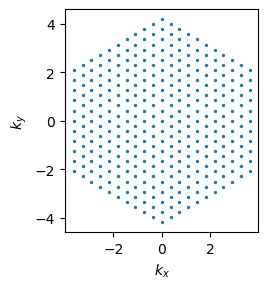

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

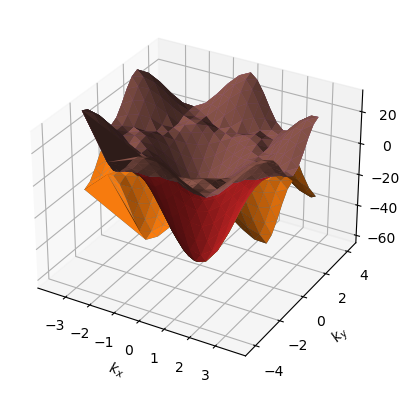

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

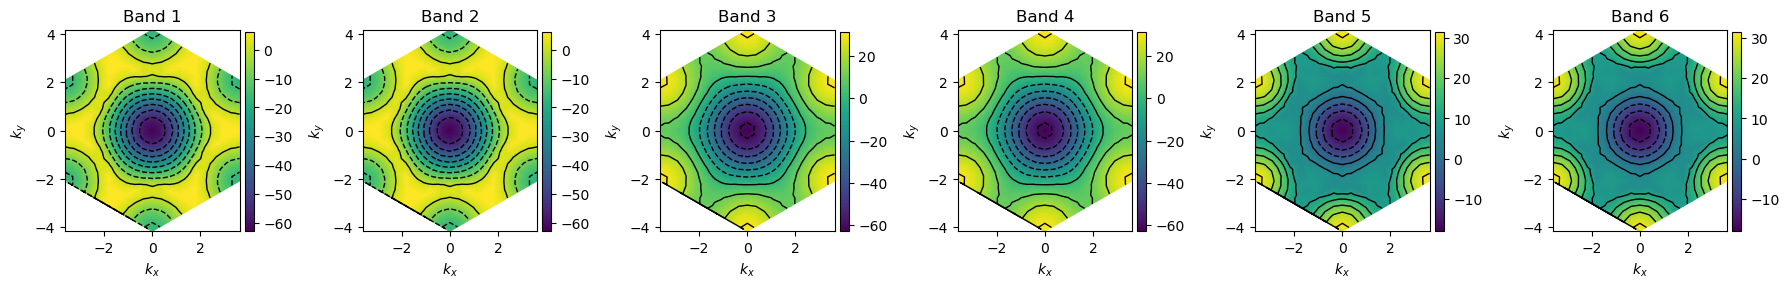

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

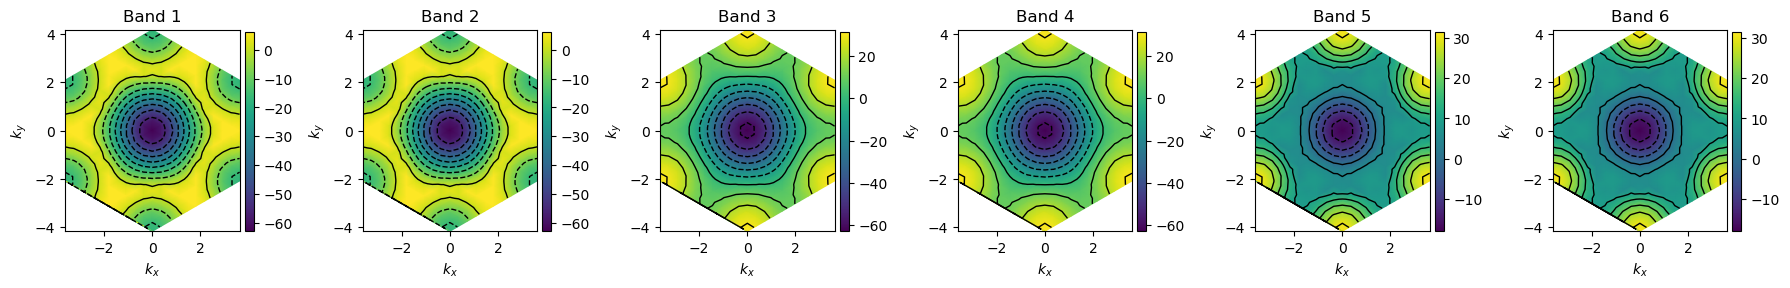

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 11


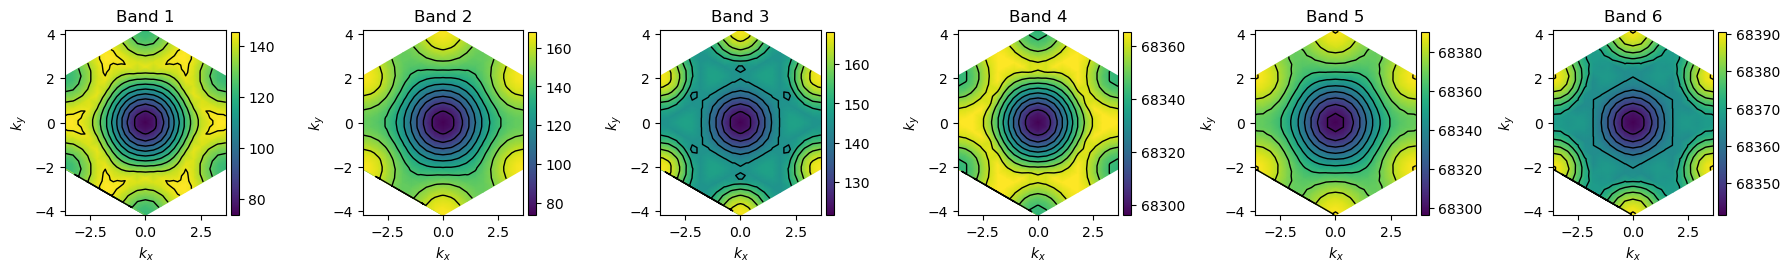

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -46.56
U/T is 930.39
mean_U is 5702.42


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze the image and determine if it correctly represents the momentum space mesh in the first Brillouin zone with the appropriate point group symmetry for the given problem.

From the image, I can see:
- A hexagonal arrangement of points in momentum (k) space
- The axes are labeled kx and ky
- The hexagonal mesh extends from approximately -4 to 4 on the ky axis and -3 to 3 on the kx axis

Let's check the requirements from the rubric:

1. Does this show a momentum space mesh in the first Brillouin zone?
   - Yes, the image shows a discrete mesh of k-points arranged in a hexagonal pattern, which is consistent with the Brillouin zone of a triangular lattice.

2. Do I need to check the point group symmetry?
   - Yes, for a triangular lattice, the Brillouin zone should have hexagonal symmetry with 6-fold rotational symmetry.
   - The mesh in the image appears to have this symmetry - it shows a hexagonal arrangement of points w

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that each band plot shows a hexagonal boundary. This is indeed the correct shape for the first Brillouin zone of a triangular lattice. The Brillouin zone of a triangular lattice should be hexagonal in shape, and that's what we observe in these plots. So this criterion is satisfied.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In Bands 1 and 2, the highest energy regions (yellow) appear at the corners of the hexagon.
In Bands 3 and 4, the highest energy regions are also at the corners.
In Bands 5 and 6, the pattern is slightly different, with the highest energy regions (yellow) also at the corners.

2.2 Trace the pattern of energy varia

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze this Hartree-Fock band structure calculation systematically according to the rubric.

1. First, I need to identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the images, I can see that each band plot shows a hexagonal boundary, which is indeed the expected shape for a triangular lattice in reciprocal space. The kx and ky axes are marked, and the zone extends from approximately -4 to 4 in both directions. This is consistent with a triangular lattice, which has a hexagonal first Brillouin zone. ✓

2. Next, examining the symmetry of the energy distribution shown by the false color plot:

2.1 The highest energy regions (yellow) in Bands 1 and 2 appear at the corners of the hexagon (K points) and in Bands 3-6, the energy pattern shifts with the highest energies in different regions.

2.2 Tracing the pattern of energy variation: In all bands, there's 

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

Let's analyze the Hartree-Fock band structure shown in the image according to the given rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, we can see that the Brillouin zone shown in each plot has a hexagonal shape. This is indeed the expected shape for a triangular lattice in reciprocal space. So this criterion is satisfied.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In each band plot, the highest energy regions (yellow) appear at the corners of the hexagonal Brillouin zone.

2.2 Trace the pattern of energy variation across the zone:
The energy varies radially from the center (lowest energy, purple) to the corners (highest energy, yellow) in all bands. The contour lines form concentric patterns with hexagonal symmetry.

2.3 Determine

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '3' saved to final_answer.yaml
